In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv("E:\\dataset\\Used Cars Price Prediction\\train-data.csv")
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
data1 = data.drop(['Unnamed: 0','Name','Location','Seats','New_Price'],axis = 'columns')
data1

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,17.74
...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,4.75
6015,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,4.00
6016,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,2.90
6017,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,2.65


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Mileage            6017 non-null   object 
 6   Engine             5983 non-null   object 
 7   Power              5983 non-null   object 
 8   Price              6019 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 423.3+ KB


In [7]:
data1.isnull().sum()

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Price                 0
dtype: int64

In [8]:
data2 = data1.dropna()
data2.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Price                0
dtype: int64

In [9]:
data2

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,17.74
...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,4.75
6015,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,4.00
6016,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,2.90
6017,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,2.65


# Working on Mileage

In [10]:
data_value = data2['Mileage'].unique()
data_value 

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [11]:
Correct_Mileage= []
for i in data2.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))

In [12]:
data2['Mileage']=Correct_Mileage

<ipython-input-12-2d4afcb03089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Mileage']=Correct_Mileage


In [13]:
data2['Mileage'].unique()

array([37.24 , 19.6  , 18.   , 20.7  , 15.   , 29.54 , 23.   , 11.3  ,
       20.5  , 22.   , 21.5  , 16.   , 25.   , 12.   ,  0.   , 13.   ,
       28.   , 20.4  , 14.8  , 22.6  , 23.6  , 13.5  , 14.   , 20.9  ,
       17.   , 19.   , 14.5  , 11.1  , 24.   , 18.1  , 11.7  , 25.3  ,
       14.6  , 14.2  , 11.2  , 16.5  , 17.1  , 25.1  , 20.3  , 13.2  ,
       13.6  , 20.   , 24.5  ,  8.   , 16.9  , 18.5  , 17.5  , 16.7  ,
       17.6  , 15.2  , 19.8  , 14.9  , 17.7  , 14.7  , 22.3  , 12.9  ,
       19.1  , 10.   , 21.   , 11.   , 21.2  , 19.2  , 21.1  , 21.7  ,
        7.8  , 21.6  , 20.6  , 26.   , 22.5  , 25.4  , 22.4  , 19.9  ,
       17.4  , 15.6  , 15.7  , 23.5  , 27.   , 16.8  , 16.3  , 11.5  ,
       22.9  , 18.8  , 22.7  , 18.4  , 16.4  ,  9.5  , 36.82 , 14.4  ,
       19.3  , 21.4  , 13.4  , 21.14 , 15.9  , 14.1  , 13.1  , 27.6  ,
       15.1  , 17.9  , 12.5  , 10.9  ,  9.   , 20.1  , 26.5  , 10.1  ,
       17.2  , 20.8  , 19.7  ,  9.4  , 12.3  , 27.3  , 13.7  , 37.562,
      

In [14]:
data2

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,1.75
1,2015,41000,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,12.50
2,2011,46000,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,4.50
3,2012,87000,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,6.00
4,2013,40670,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,17.74
...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.00,1248 CC,74 bhp,4.75
6015,2015,100000,Diesel,Manual,First,24.00,1120 CC,71 bhp,4.00
6016,2012,55000,Diesel,Manual,Second,14.00,2498 CC,112 bhp,2.90
6017,2013,46000,Petrol,Manual,First,18.00,998 CC,67.1 bhp,2.65


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5981 non-null   int64  
 1   Kilometers_Driven  5981 non-null   int64  
 2   Fuel_Type          5981 non-null   object 
 3   Transmission       5981 non-null   object 
 4   Owner_Type         5981 non-null   object 
 5   Mileage            5981 non-null   float64
 6   Engine             5981 non-null   object 
 7   Power              5981 non-null   object 
 8   Price              5981 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 467.3+ KB


In [16]:
data2['Mileage'].describe()

count    5981.000000
mean       18.030608
std         4.839329
min         0.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        46.956000
Name: Mileage, dtype: float64

Text(0, 0.5, 'Price')

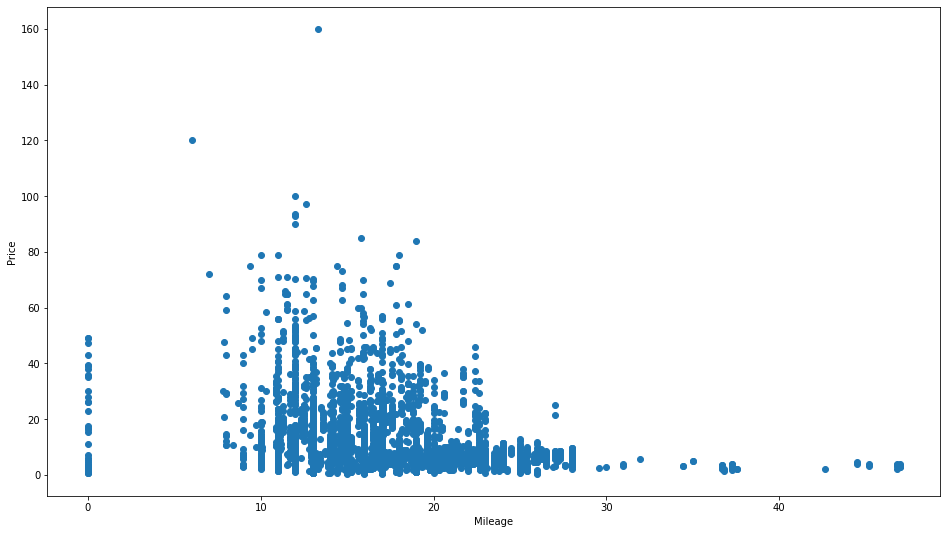

In [17]:
plt.figure(figsize = (16,9))
plt.scatter(data2['Mileage'],data2['Price'])
plt.xlabel("Mileage")
plt.ylabel("Price")

{'whiskers': [<matplotlib.lines.Line2D at 0x867993f940>,
 'caps': [<matplotlib.lines.Line2D at 0x867994f040>,
 'boxes': [<matplotlib.lines.Line2D at 0x867993f5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x867994f700>],
 'fliers': [<matplotlib.lines.Line2D at 0x867994fa60>],
 'means': []}

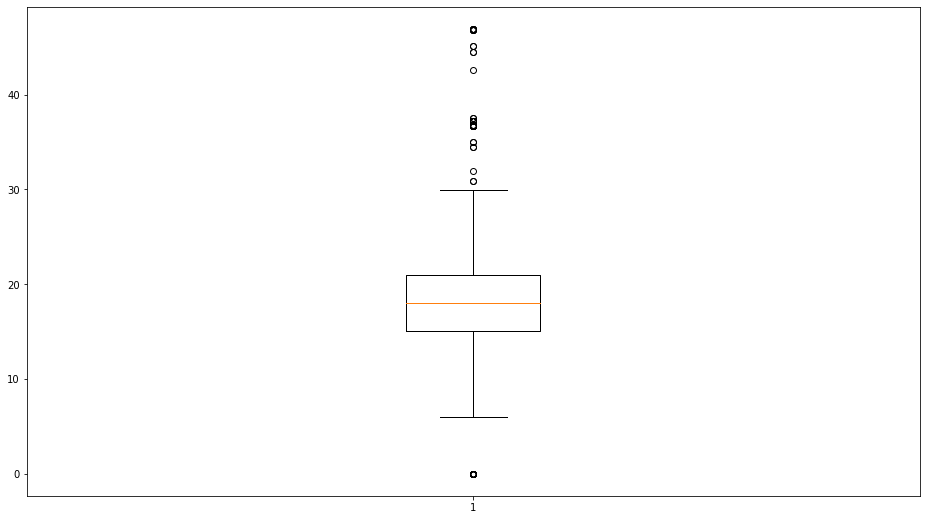

In [18]:
plt.figure(figsize = (16,9))
plt.boxplot(data2['Mileage'])

In [19]:
data2[data2['Mileage']<9]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
14,2012,85000,Diesel,Automatic,Second,0.0,2179 CC,115 bhp,17.50
67,2019,15369,Diesel,Automatic,First,0.0,1950 CC,194 bhp,35.67
70,2008,73000,Petrol,Automatic,First,8.0,4806 CC,500 bhp,14.50
79,2005,87591,Petrol,Manual,First,0.0,1086 CC,null bhp,1.30
152,2010,35277,Petrol,Automatic,First,7.8,5461 CC,362.9 bhp,30.00
...,...,...,...,...,...,...,...,...,...
5875,2019,4000,Diesel,Automatic,First,0.0,1950 CC,194 bhp,35.00
5943,2002,75000,Diesel,Manual,First,0.0,2112 CC,null bhp,1.70
5972,2008,65000,Petrol,Manual,Second,0.0,1086 CC,62 bhp,1.39
6006,2009,102002,Diesel,Automatic,First,8.0,2987 CC,224.34 bhp,10.75


In [20]:
data3 = data2[data2['Mileage']>9]
data3.head(15)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,1.75
1,2015,41000,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,12.50
2,2011,46000,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,4.50
3,2012,87000,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,6.00
4,2013,40670,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,17.74
5,2012,75000,LPG,Manual,First,29.54,814 CC,55.2 bhp,2.35
6,2013,86999,Diesel,Manual,First,23.00,1461 CC,63.1 bhp,3.50
7,2016,36000,Diesel,Automatic,First,11.30,2755 CC,171.5 bhp,17.50
8,2013,64430,Diesel,Manual,First,20.50,1598 CC,103.6 bhp,5.20
9,2012,65932,Diesel,Manual,Second,22.00,1248 CC,74 bhp,1.95


In [21]:
data3.shape

(5886, 9)

Text(0, 0.5, 'Price')

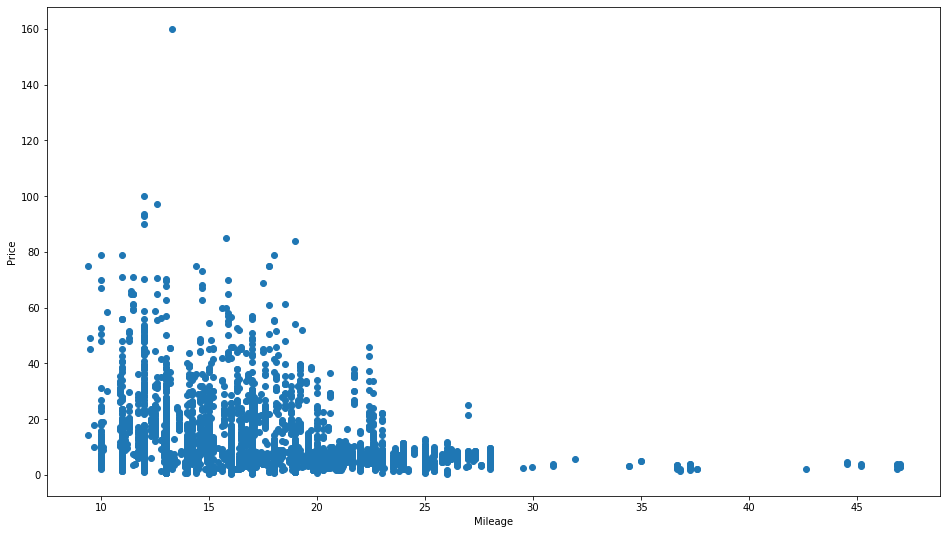

In [22]:
plt.figure(figsize = (16,9))
plt.scatter(data3['Mileage'],data3['Price'])
plt.xlabel("Mileage")
plt.ylabel("Price")

# Working on Engine

In [23]:
data3['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1998 CC', '1193 CC', '1086 CC', '2982 CC',
       '1493 CC', '2967 CC', '2993 CC', '1196 CC', '1799 CC', '2497 CC',
       '2354 CC', '1373 CC', '2996 CC', '1591 CC', '2894 CC', '1595 CC',
       '936 CC', '1997 CC', '1896 CC', '1390 CC', '1364 CC', '2199 CC',
       '993 CC', '999 CC', '1405 CC', '2956 CC', '1794 CC', '995 CC',
       '2496 CC', '1599 CC', '2400 CC', '1495 CC', '2523 CC', '793 CC',
       '4134 CC', '1596 CC', '1950 CC', '1395 CC', '2953 CC', '1586 CC',
       '2362 CC', '1496 CC', '1368 CC', '1298 CC', '1956 CC',

In [24]:
def split(x):
    return x.split(' ')[0]

In [25]:
data3['Engine'] = data3['Engine'].astype(str).apply(split)

<ipython-input-25-9aa8b5e4695d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Engine'] = data3['Engine'].astype(str).apply(split)


In [26]:
data3['Engine'].unique()

array(['998', '1582', '1199', '1248', '1968', '814', '1461', '2755',
       '1598', '1462', '1497', '2179', '2477', '1498', '2143', '1995',
       '1984', '1197', '2494', '1798', '2696', '2698', '1061', '1198',
       '2987', '796', '624', '1999', '1991', '2694', '1120', '2498',
       '799', '2393', '1399', '1796', '2148', '1396', '1998', '1193',
       '1086', '2982', '1493', '2967', '2993', '1196', '1799', '2497',
       '2354', '1373', '2996', '1591', '2894', '1595', '936', '1997',
       '1896', '1390', '1364', '2199', '993', '999', '1405', '2956',
       '1794', '995', '2496', '1599', '2400', '1495', '2523', '793',
       '4134', '1596', '1950', '1395', '2953', '1586', '2362', '1496',
       '1368', '1298', '1956', '1299', '3498', '2835', '1150', '3198',
       '1343', '1499', '1186', '1590', '2609', '2499', '2446', '1978',
       '2360', '2198', '4367', '1422', '1969', '1489', '2489', '1242',
       '1388', '1172', '2495', '2979', '4806', '1194', '3200', '1781',
       '1341', '

In [27]:
data3['Engine'] = data3['Engine'].astype(float)

<ipython-input-27-c44e1344d331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Engine'] = data3['Engine'].astype(float)


In [28]:
data3['Engine'].dtype

dtype('float64')

In [29]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5886 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5886 non-null   int64  
 1   Kilometers_Driven  5886 non-null   int64  
 2   Fuel_Type          5886 non-null   object 
 3   Transmission       5886 non-null   object 
 4   Owner_Type         5886 non-null   object 
 5   Mileage            5886 non-null   float64
 6   Engine             5886 non-null   float64
 7   Power              5886 non-null   object 
 8   Price              5886 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 459.8+ KB


In [30]:
data3['Engine'].describe()

count    5886.000000
mean     1609.343187
std       577.861760
min       624.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5461.000000
Name: Engine, dtype: float64

Text(0, 0.5, 'Engine')

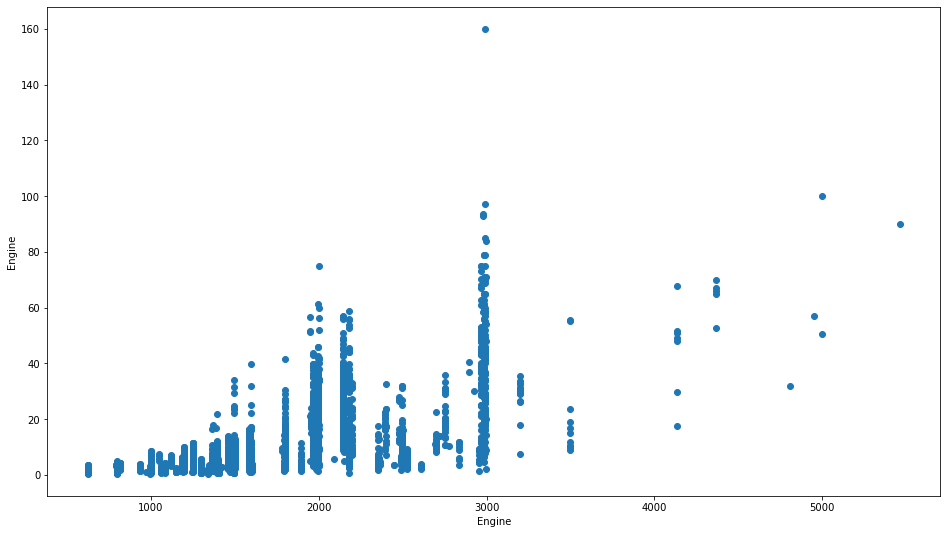

In [31]:
plt.figure(figsize = (16,9))
plt.scatter(data3['Engine'],data3['Price'])
plt.xlabel("Engine")
plt.ylabel("Engine")

{'whiskers': [<matplotlib.lines.Line2D at 0x86799d74c0>,
 'caps': [<matplotlib.lines.Line2D at 0x86799d7b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x86799d7160>],
 'medians': [<matplotlib.lines.Line2D at 0x86799e4280>],
 'fliers': [<matplotlib.lines.Line2D at 0x86799e45e0>],
 'means': []}

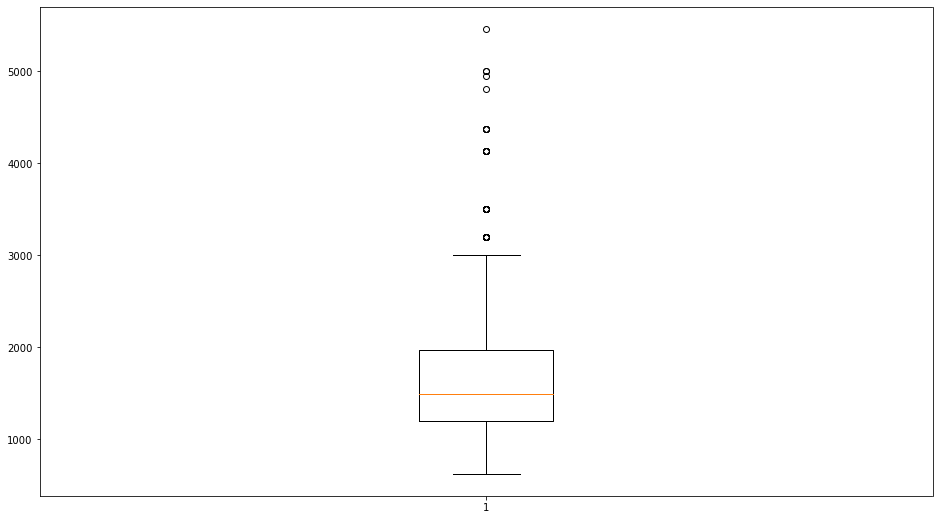

In [32]:
plt.figure(figsize = (16,9))
plt.boxplot(data3['Engine'])

In [33]:
data3[data3['Engine'] > 5000]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
4691,2014,3000,Petrol,Automatic,Second,12.0,5461.0,421 bhp,90.0


In [34]:
data4 = data3[data3['Engine'] < 5000]
data4

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,1.75
1,2015,41000,Diesel,Manual,First,19.60,1582.0,126.2 bhp,12.50
2,2011,46000,Petrol,Manual,First,18.00,1199.0,88.7 bhp,4.50
3,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76 bhp,6.00
4,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.8 bhp,17.74
...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.00,1248.0,74 bhp,4.75
6015,2015,100000,Diesel,Manual,First,24.00,1120.0,71 bhp,4.00
6016,2012,55000,Diesel,Manual,Second,14.00,2498.0,112 bhp,2.90
6017,2013,46000,Petrol,Manual,First,18.00,998.0,67.1 bhp,2.65


Text(0, 0.5, 'Engine')

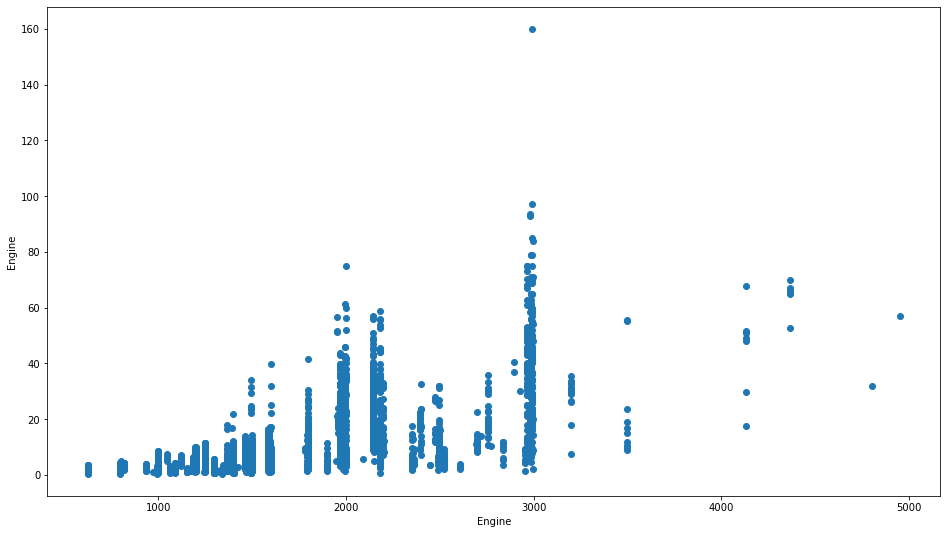

In [35]:
plt.figure(figsize = (16,9))
plt.scatter(data4['Engine'],data4['Price'])
plt.xlabel("Engine")
plt.ylabel("Engine")

In [36]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5883 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5883 non-null   int64  
 1   Kilometers_Driven  5883 non-null   int64  
 2   Fuel_Type          5883 non-null   object 
 3   Transmission       5883 non-null   object 
 4   Owner_Type         5883 non-null   object 
 5   Mileage            5883 non-null   float64
 6   Engine             5883 non-null   float64
 7   Power              5883 non-null   object 
 8   Price              5883 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 459.6+ KB


In [37]:
data4

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,First,37.24,998.0,58.16 bhp,1.75
1,2015,41000,Diesel,Manual,First,19.60,1582.0,126.2 bhp,12.50
2,2011,46000,Petrol,Manual,First,18.00,1199.0,88.7 bhp,4.50
3,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76 bhp,6.00
4,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.8 bhp,17.74
...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.00,1248.0,74 bhp,4.75
6015,2015,100000,Diesel,Manual,First,24.00,1120.0,71 bhp,4.00
6016,2012,55000,Diesel,Manual,Second,14.00,2498.0,112 bhp,2.90
6017,2013,46000,Petrol,Manual,First,18.00,998.0,67.1 bhp,2.65


# Working on Power

In [38]:
data4['Power'][78]

'102 bhp'

In [39]:
data4['Power'].unique()

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', '88.76 bhp', '140.8 bhp',
       '55.2 bhp', '63.1 bhp', '171.5 bhp', '103.6 bhp', '74 bhp',
       '103.25 bhp', '116.3 bhp', '187.7 bhp', '175.56 bhp', '98.6 bhp',
       '83.8 bhp', '167.62 bhp', '190 bhp', '88.5 bhp', '177.01 bhp',
       '80 bhp', '67.1 bhp', '102 bhp', '108.45 bhp', '138.1 bhp',
       '184 bhp', '179.5 bhp', '103.5 bhp', '64 bhp', '82 bhp',
       '254.8 bhp', '73.9 bhp', '46.3 bhp', '37.5 bhp', '77 bhp',
       '82.9 bhp', '149.92 bhp', '138.03 bhp', '112.2 bhp', '163.7 bhp',
       '71 bhp', '105 bhp', '174.33 bhp', '75 bhp', '103.2 bhp',
       '53.3 bhp', '78.9 bhp', '147.6 bhp', '147.8 bhp', '68 bhp',
       '186 bhp', '170 bhp', '69 bhp', '140 bhp', '78 bhp', '108.5 bhp',
       '86.8 bhp', '187.74 bhp', 'null bhp', '132 bhp', '86.7 bhp',
       '73.94 bhp', '117.3 bhp', '218 bhp', '168.5 bhp', '89.84 bhp',
       '110 bhp', '90 bhp', '82.85 bhp', '67 bhp', '241.4 bhp', '35 bhp',
       '270.9 bhp', '126.32 bhp'

In [40]:
def split(x):
    return x.split(' ')[0]

In [41]:
data4['Power'] = data4['Power'].astype(str).apply(split)

<ipython-input-41-8d8f63cab198>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Power'] = data4['Power'].astype(str).apply(split)


In [42]:
data4['Power'].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '175.56',
       '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80', '67.1',
       '102', '108.45', '138.1', '184', '179.5', '103.5', '64', '82',
       '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92', '138.03',
       '112.2', '163.7', '71', '105', '174.33', '75', '103.2', '53.3',
       '78.9', '147.6', '147.8', '68', '186', '170', '69', '140', '78',
       '108.5', '86.8', '187.74', 'null', '132', '86.7', '73.94', '117.3',
       '218', '168.5', '89.84', '110', '90', '82.85', '67', '241.4', '35',
       '270.9', '126.32', '73', '130', '100.6', '150', '75.94', '215',
       '107.3', '37.48', '120', '178', '152', '91.1', '85.80', '362.07',
       '121.3', '143', '81.80', '171', '76.8', '103.52', '444', '67.06',
       '120.7', '258', '81.86', '112', '88.73', '57.6', '157.75', '102.5',
       '201.1', '83.1', '68.05', '88.50', '106', '100', '81.83'

In [43]:
data4['Power'].replace('null',0 ,inplace = True)

C:\Users\Priti\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [44]:
data4['Power'].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '175.56',
       '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80', '67.1',
       '102', '108.45', '138.1', '184', '179.5', '103.5', '64', '82',
       '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92', '138.03',
       '112.2', '163.7', '71', '105', '174.33', '75', '103.2', '53.3',
       '78.9', '147.6', '147.8', '68', '186', '170', '69', '140', '78',
       '108.5', '86.8', '187.74', 0, '132', '86.7', '73.94', '117.3',
       '218', '168.5', '89.84', '110', '90', '82.85', '67', '241.4', '35',
       '270.9', '126.32', '73', '130', '100.6', '150', '75.94', '215',
       '107.3', '37.48', '120', '178', '152', '91.1', '85.80', '362.07',
       '121.3', '143', '81.80', '171', '76.8', '103.52', '444', '67.06',
       '120.7', '258', '81.86', '112', '88.73', '57.6', '157.75', '102.5',
       '201.1', '83.1', '68.05', '88.50', '106', '100', '81.83', '85

In [45]:
data4['Power'] = data4['Power'].astype(float)
data4['Power'].dtypes

<ipython-input-45-8765da376aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Power'] = data4['Power'].astype(float)


dtype('float64')

In [46]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5883 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5883 non-null   int64  
 1   Kilometers_Driven  5883 non-null   int64  
 2   Fuel_Type          5883 non-null   object 
 3   Transmission       5883 non-null   object 
 4   Owner_Type         5883 non-null   object 
 5   Mileage            5883 non-null   float64
 6   Engine             5883 non-null   float64
 7   Power              5883 non-null   float64
 8   Price              5883 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 588.6+ KB


In [47]:
data4['Power'].describe()

count    5883.000000
mean      110.531047
std        52.232603
min         0.000000
25%        74.000000
50%        91.700000
75%       138.030000
max       550.000000
Name: Power, dtype: float64

In [48]:
data4[data4['Power'] <= 0]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
76,2008,111111,Diesel,Manual,First,17.0,1399.0,0.0,2.00
89,2007,73745,Petrol,Manual,First,17.0,1086.0,0.0,2.10
120,2005,102000,Petrol,Manual,Second,17.0,1086.0,0.0,0.85
143,2008,80759,Petrol,Manual,Third,17.0,1086.0,0.0,1.67
227,2013,47000,Diesel,Manual,First,17.0,1248.0,0.0,4.10
...,...,...,...,...,...,...,...,...,...
5861,2007,79000,Petrol,Manual,First,17.0,1086.0,0.0,1.85
5873,2006,47200,Petrol,Manual,Second,17.0,1086.0,0.0,1.20
5893,2008,51000,Petrol,Manual,Second,19.0,1061.0,0.0,1.75
5925,2010,85000,Petrol,Manual,First,17.0,1798.0,0.0,2.85


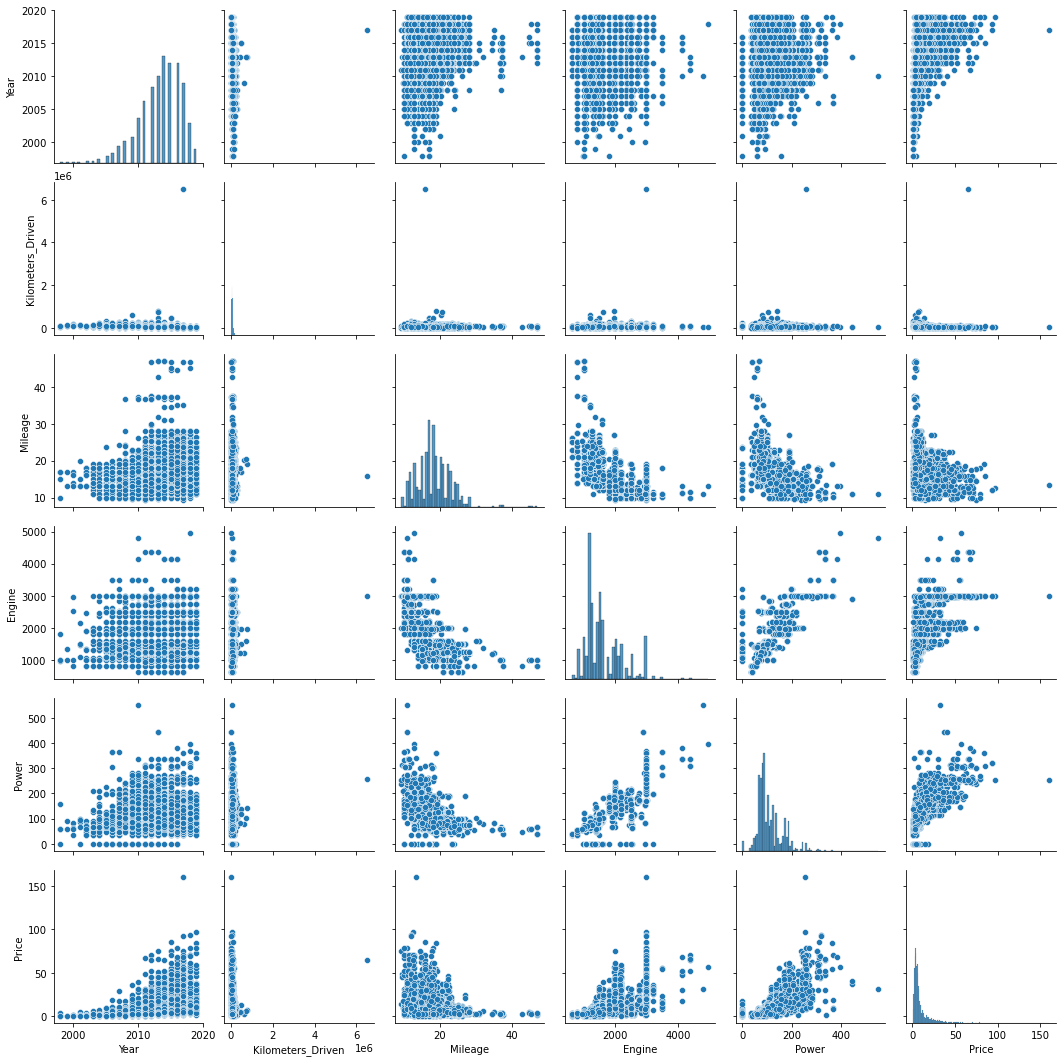

In [49]:
sns.pairplot(data4)

In [50]:
data5 = data4[data4['Power'] > 0]

In [51]:
data5.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,First,37.24,998.0,58.16,1.75
1,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,12.50
2,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,4.50
3,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,6.00
4,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,17.74


In [52]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5807 entries, 0 to 6018
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5807 non-null   int64  
 1   Kilometers_Driven  5807 non-null   int64  
 2   Fuel_Type          5807 non-null   object 
 3   Transmission       5807 non-null   object 
 4   Owner_Type         5807 non-null   object 
 5   Mileage            5807 non-null   float64
 6   Engine             5807 non-null   float64
 7   Power              5807 non-null   float64
 8   Price              5807 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 453.7+ KB


#  Apply onehot-encoding on Fuel_Type,  Transmission ,   Owner_Type 

In [53]:
data6 = pd.get_dummies(data5['Fuel_Type'])
data6.head(5)

,CNG,Diesel,LPG,Petrol
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [54]:
data7 = pd.get_dummies(data5['Transmission'])
data7.head(5)

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [55]:
data8 = pd.get_dummies(data5['Owner_Type'])
data8.head(5)

,First,Fourth & Above,Second,Third
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0


In [56]:
data_new = pd.concat([data5,data6,data7,data8],axis = 'columns')
data_new.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,2010,72000,CNG,Manual,First,37.24,998.0,58.16,1.75,1,0,0,0,0,1,1,0,0,0
1,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,12.50,0,1,0,0,0,1,1,0,0,0
2,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,4.50,0,0,0,1,0,1,1,0,0,0
3,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,6.00,0,1,0,0,0,1,1,0,0,0
4,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,17.74,0,1,0,0,1,0,0,0,1,0


In [57]:
data_new_all = data_new.drop(['Fuel_Type','Transmission','Owner_Type'],axis = 'columns')
data_new_all.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,CNG,Diesel,LPG,Petrol,Automatic,Manual,First,Fourth & Above,Second,Third
0,2010,72000,37.24,998.0,58.16,1.75,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.60,1582.0,126.20,12.50,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.00,1199.0,88.70,4.50,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.70,1248.0,88.76,6.00,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.00,1968.0,140.80,17.74,0,1,0,0,1,0,0,0,1,0


In [58]:
data_new_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5807 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5807 non-null   int64  
 1   Kilometers_Driven  5807 non-null   int64  
 2   Mileage            5807 non-null   float64
 3   Engine             5807 non-null   float64
 4   Power              5807 non-null   float64
 5   Price              5807 non-null   float64
 6   CNG                5807 non-null   uint8  
 7   Diesel             5807 non-null   uint8  
 8   LPG                5807 non-null   uint8  
 9   Petrol             5807 non-null   uint8  
 10  Automatic          5807 non-null   uint8  
 11  Manual             5807 non-null   uint8  
 12  First              5807 non-null   uint8  
 13  Fourth & Above     5807 non-null   uint8  
 14  Second             5807 non-null   uint8  
 15  Third              5807 non-null   uint8  
dtypes: float64(4), int64(2),

In [60]:
data_new_all.to_csv("Used_Car_Price_clean_dataset.csv",index = False)